# COGS 108 - Final Project 

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID. Add lines as needed for your group size, and make sure each ID is listed on a separate line. 

- A92055344
- A13996875
- A92090168

#### Introduction: Chocolate, as one of most popular candies in United States, is closely related to our daily lives. On average, the residents of United States consume over 2.8 billion pounds of chocolate every year. However, when we choose what type of chocolate to buy, the massive amount of choices of chocolate can be a difficult issue. Therefore, we want to the use the dataset of the chocolate bars rating to find out how do different factors influence chocolate rating.

### Research Question: How do different factors influence chocolate rating

### Hypothesis: 

The chocolate company and chocolate bean origin have the most impact on rating. The quality of chocolate from a company may not vary a lot.

### Dataset(s)

- Dataset Name:  Chocolate Bar Ratings
- Link to the dataset: https://www.kaggle.com/rtatman/chocolate-bar-ratings
- Number of observations: over 1700 chocolate bars


This dataset contains multiple aspects of over 1,700 individual chocolate bars. These include the rating of the chocolate bars, their regional origin, bean type, percentage of cocoa, the name of the company manufacturing the chocolate and the company locations.


### Background and Prior Work

From the first reference, we found that most chocolate bean origins are from tropical countries. The three main varieties of cocoa plant are Forastero, Criollo, and Trinitario. The first is the most widely used, comprising 80-90% of the world production of cocoa. Tropical and rainy weather are good for cocoa harvesting. Those countries have a long history for planting cocoa, which leads to a higher quality of cocoa over years. Therefore, we hypothesize that chocolate bean origin has a huge impact on rating.
Also, some chocolate companies are famous for their unique chocolate process and refining works. The quality of chocolate produced by them makes these companies become world-famous brand. Thus, chocolate company is another factor for good chocolate rating. 

References (include links):
- 1) https://www.c-spot.com/chocolate-census/bars/
- 2) https://chocolateratings.wordpress.com/


### Proposed Methods

*Data Cleaning (2-3 sentences)*

For the bean type column, most of the rows have missing data. Thus, we decide to drop this column. 
The “data added time” column is irrelevant to our analysis. So, we also decide to drop this column.

*Data Analysis (1-2 paragraphs)*

We plot out the rating graph to check its distribution. We may need to “log” the data to get a normal distribution. We will also extract the data by specific index and then plot all of them in one correlation graph to see their correlation. If they have relatively high correlation, we will add them into our report.
We will investigate the relationship between the numerical values (for instance, how the cocoa percentage would influence the rating). For the string values, such as the location/origin/company of the cocoa beans, we would calculate the mean of cocoa beans for each origin AND then compare them with other regions’ average cocoa value.  

*What to report (2-3 sentences)*

The relation between chocolate rating and their origins/companies. For example, the average rating from a specific area. The correlation (graph) of different factors that may influence the chocolate rating. 

Packages we plan to use:
- a panda, numpy
- b matplotlib

In [1]:
# data processing & analysis packages: 
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

# data visualization packages: for plotting, geospatial analyzes, and more...
import matplotlib.pyplot as plt
from matplotlib import rcParams


/Users/phil/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Data Cleaning & Preprocessing

In [2]:
# our chocolate dataset --> into a dataframe: df
df = pd.read_csv('flavors_of_cacao.csv')

In [3]:
# get a glimpse of new the chocolate data
df

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [4]:
# drop 111111
df = df.drop((['REF','Review\nDate', 'Bean\nType']), axis=1)

In [5]:
# Renaming the columns of the dataframe
df.columns = ["Company", "Specific_Bean_Origin", "Cocoa_Percent", "Company_Location", "Rating", "Broad_Bean_Origin"]

In [6]:
df['Broad_Bean_Origin'].replace(' ', np.nan, inplace=True)

In [7]:
df.head()

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,Togo
2,A. Morin,Atsane,70%,France,3.00,Togo
3,A. Morin,Akata,70%,France,3.50,Togo
4,A. Morin,Quilla,70%,France,3.50,Peru


In [8]:
df.dropna(subset=["Broad_Bean_Origin"],inplace = True)

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1794,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific_Bean_Origin,1794,1039,Madagascar,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cocoa_Percent,1794,45,70%,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company_Location,1794,60,U.S.A.,763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1794,NaN,NaN,NaN,3.18632,0.477921,1,3,3.25,3.5,5
Broad_Bean_Origin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


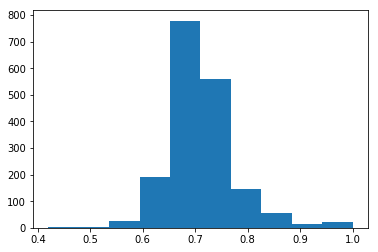

In [10]:
cocoa_percent = df['Cocoa_Percent']
cocoa_percent = [float(a.strip('%'))/100 for a in cocoa_percent]

df['Cocoa_Percent'] = cocoa_percent
plt.hist(cocoa_percent)

plt.show()


In [11]:
df.dtypes

Company                  object
Specific_Bean_Origin     object
Cocoa_Percent           float64
Company_Location         object
Rating                  float64
Broad_Bean_Origin        object
dtype: object

In [12]:
# get a glimpse of new the chocolate data
df.head()

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,0.70,France,2.75,Togo
2,A. Morin,Atsane,0.70,France,3.00,Togo
3,A. Morin,Akata,0.70,France,3.50,Togo
4,A. Morin,Quilla,0.70,France,3.50,Peru


## Data Visualization and Analysis

In [13]:
# Rating

rating = df['Rating']
rating.mean()

3.186315496098105

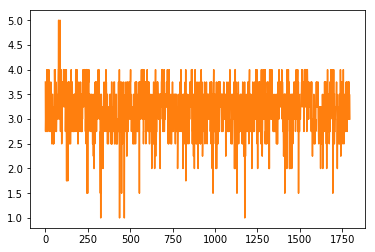

In [56]:
plt.plot(rating)
plt.show()

Count of Chocolate Bar Ratings


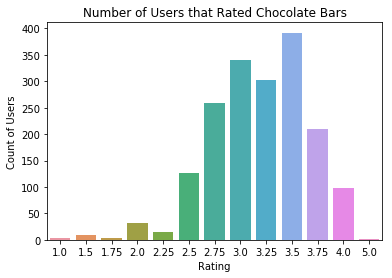

In [58]:
#
sns.countplot(x='Rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count of Users')
plt.title('Number of Users that Rated Chocolate Bars')
print('Count of Chocolate Bar Ratings')
plt.show()

### (1) Explore the relationship between rating and company

In [16]:
df['Company'].value_counts()

Soma                                      47
Bonnat                                    27
Fresco                                    26
Pralus                                    25
A. Morin                                  23
Domori                                    22
Arete                                     22
Guittard                                  22
Valrhona                                  21
Hotel Chocolat (Coppeneur)                19
Coppeneur                                 18
Zotter                                    17
Mast Brothers                             17
Scharffen Berger                          17
Artisan du Chocolat                       16
Rogue                                     16
Dandelion                                 16
Smooth Chocolator, The                    16
Szanto Tibor                              15
Pierre Marcolini                          14
Tejas                                     14
Castronovo                                14
Bitterswee

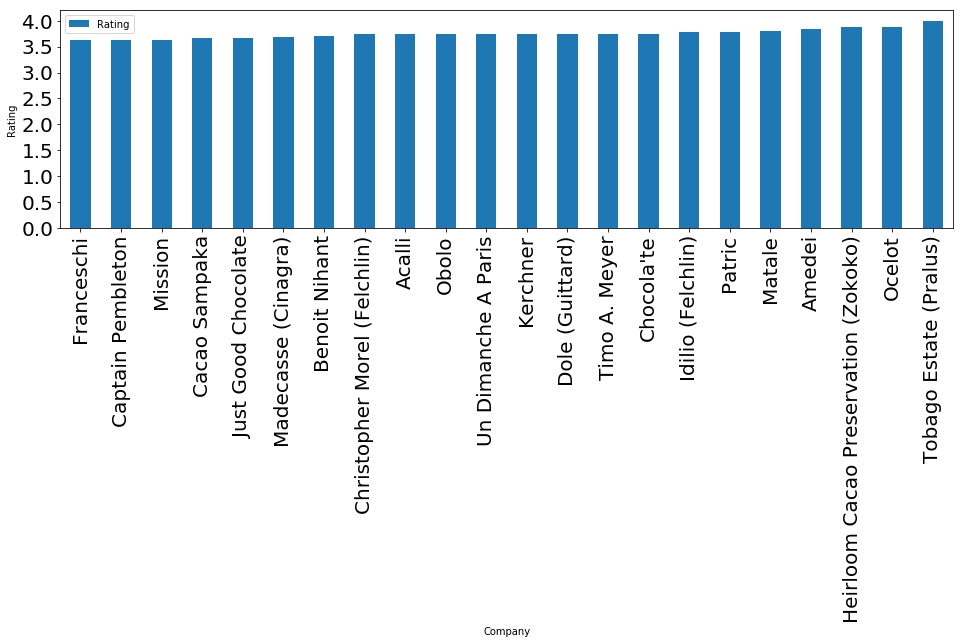

In [46]:
company_list = df["Company"].unique()

rating_list = []
for each_company in company_list:
    df_each = df[df["Company"] == each_company]
    average = df_each["Rating"].mean()
    rating_list.append(average)

company_vs_rating = pd.DataFrame(rating_list, company_list)
company_vs_rating.reset_index(level=0, inplace=True)
company_vs_rating.columns = ["Company", 'Rating']
company_vs_rating
company_vs_rating = company_vs_rating.sort_values(by=['Rating'])
company_vs_rating = company_vs_rating[company_vs_rating['Rating'] > 3.6]
company_vs_rating.plot(x='Company', y='Rating', kind='bar', figsize=(16,4), fontsize=20)
plt.xlabel('Company')
plt.ylabel('Rating')
plt.show()


### (2) Explore the relationship between rating and company location

In [17]:
Company_Location = df['Company_Location']
Company_Location = set(Company_Location)

In [18]:
Company_Location

{'Amsterdam',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Domincan Republic',
 'Ecuador',
 'Eucador',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Lithuania',
 'Madagascar',
 'Martinique',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Niacragua',
 'Nicaragua',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Russia',
 'Sao Tome',
 'Scotland',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'St. Lucia',
 'Suriname',
 'Sweden',
 'Switzerland',
 'U.K.',
 'U.S.A.',
 'Venezuela',
 'Vietnam',
 'Wales'}

Top 15 chocolate bar country distribution


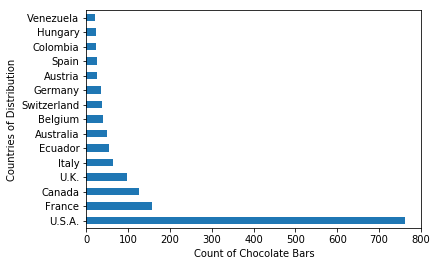

In [19]:
df['Company_Location'].value_counts().head(15).plot('barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Countries of Distribution')
print("Top 15 chocolate bar country distribution")
plt.show()

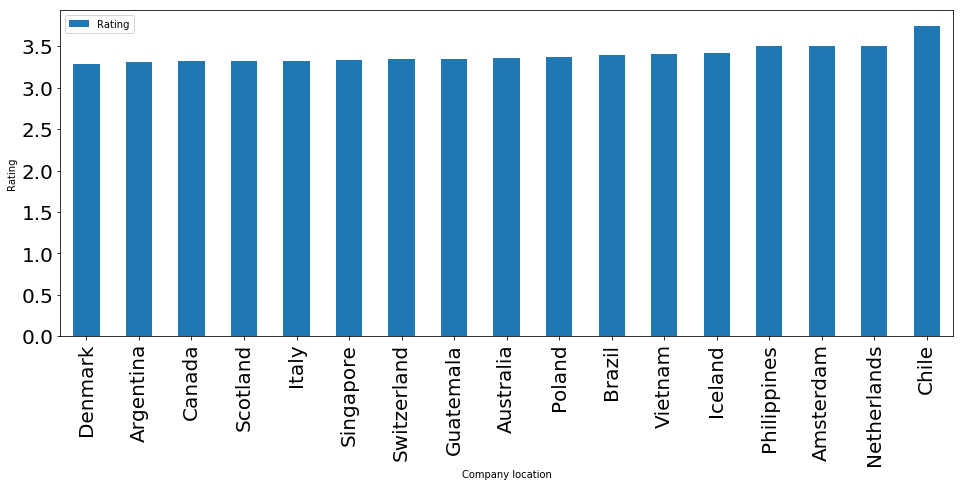

In [40]:
company_list = df["Company_Location"].unique()

rating_list = []
for each_company in company_list:
    df_each = df[df["Company_Location"] == each_company]
    average = df_each["Rating"].mean()
    rating_list.append(average)

company_vs_rating = pd.DataFrame(rating_list, company_list)
company_vs_rating.reset_index(level=0, inplace=True)
company_vs_rating.columns = ["Company location", 'Rating']
company_vs_rating
company_vs_rating = company_vs_rating.sort_values(by=['Rating'])
company_vs_rating = company_vs_rating[company_vs_rating['Rating'] > 3.27]
company_vs_rating.plot(x='Company location', y='Rating', kind='bar', figsize=(16,6), fontsize=20)
plt.xlabel('Company location')
plt.ylabel('Rating')
plt.show()



### (3) Explore the relationship between rating and cocoa_percent

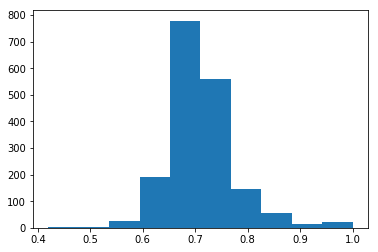

In [21]:
plt.hist(cocoa_percent)
plt.show()



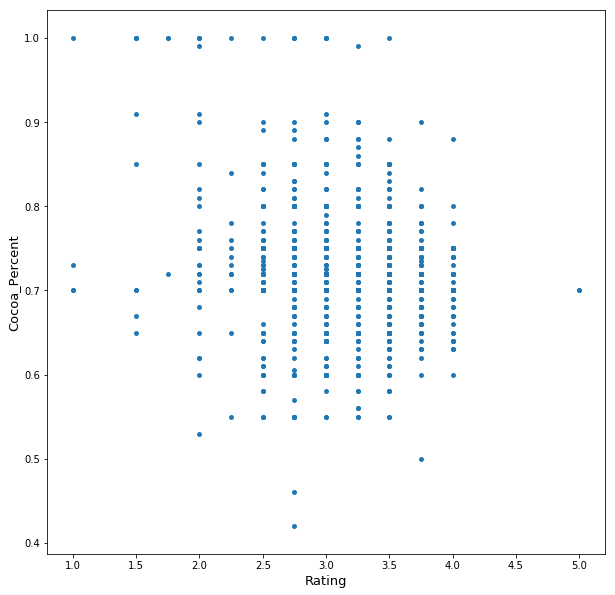

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df['Rating'], y = df['Cocoa_Percent'], s=15)
plt.ylabel('Cocoa_Percent', fontsize=13)
plt.xlabel('Rating', fontsize=13)
plt.show()

In [23]:
cocoa_one_hundred = df[df['Cocoa_Percent' ] > 0.9] 
#how many chocolate bars have a 100 percent rating 
cocoa_one_hundred.count()



Company                 25
Specific_Bean_Origin    25
Cocoa_Percent           25
Company_Location        25
Rating                  25
Broad_Bean_Origin       25
dtype: int64

In [24]:
cocoa_one_hundred

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
125,Artisan du Chocolat,Venezuela,1.00,U.K.,1.75,Venezuela
245,Bonnat,One Hundred,1.00,France,1.50,
249,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",1.00,Ecuador,1.50,Ecuador
324,Cacaoyere (Ecuatoriana),Pichincha,0.91,Ecuador,1.50,Ecuador
330,C-Amaro,Ecuador,1.00,Italy,3.50,Ecuador
437,Claudio Corallo,Principe,1.00,Sao Tome,1.00,Sao Tome & Principe
449,Coppeneur,Ecuador Puristique,1.00,Germany,1.50,Ecuador
557,Domori,"IL100, H. San Jose",1.00,Italy,3.00,Venezuela
759,Guittard,Nocturne,0.91,U.S.A.,3.00,
779,Habitual,one hundred,1.00,Canada,2.00,


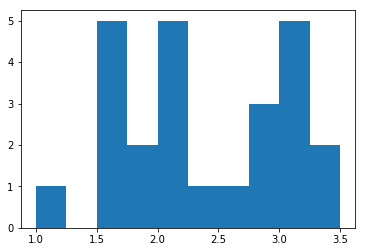

Fig 5: Ratings of Chocolate Bars with 100% Cocoa
The average rating of Cocoa percentage greater than 90%: 2.27


In [25]:
plt.hist(cocoa_one_hundred['Rating'])
plt.show()
print("Fig 5: Ratings of Chocolate Bars with 100% Cocoa")

mean_cocoa_90 = cocoa_one_hundred['Rating'].mean()
print("The average rating of Cocoa percentage greater than 90%: " + str(mean_cocoa_90))

In [26]:
cocoa_sixty = df[df['Cocoa_Percent' ] < 0.6] 

#how many chocolate bars have a 100 percent rating 
cocoa_sixty.count()

Company                 31
Specific_Bean_Origin    31
Cocoa_Percent           31
Company_Location        31
Rating                  31
Broad_Bean_Origin       31
dtype: int64

In [27]:
cocoa_sixty

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
29,Aequare (Gianduja),"Los Rios, Quevedo, Arriba",0.55,Ecuador,2.75,Ecuador
90,AMMA,"Monte Alegre, 3 diff. plantations",0.50,Brazil,3.75,Brazil
182,Bernachon,Nature,0.55,France,2.75,
342,Caoni (Tulicorp),Manabi,0.55,Ecuador,3.00,Ecuador
343,Caoni (Tulicorp),Los Rios,0.55,Ecuador,3.25,Ecuador
344,Caoni (Tulicorp),Esmeraldas,0.55,Ecuador,3.50,Ecuador
378,Chchukululu (Tulicorp),Arriba,0.55,Ecuador,2.75,Ecuador
429,Chokolat Elot (Girard),Guadeloupe,0.42,Martinique,2.75,Martinique
518,Davis,West Africa,0.58,U.S.A.,3.25,West Africa
614,El Rey,"Carenero Superior, Bucare",0.58,Venezuela,2.50,Venezuela


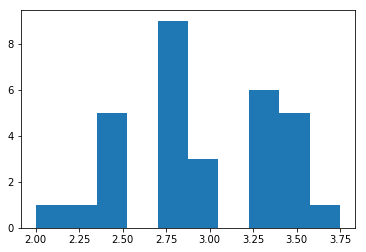

Fig: Ratings of Chocolate Bars less than 60% Cocoa
The average rating of Cocoa percentage less than 60%: 2.943548387096774


In [28]:
plt.hist(cocoa_sixty['Rating'])
plt.show()
print("Fig: Ratings of Chocolate Bars less than 60% Cocoa")

mean_cocoa_60 = cocoa_sixty['Rating'].mean()
print("The average rating of Cocoa percentage less than 60%: " + str(mean_cocoa_60))

In [29]:
cocoa_seventy = df[(df['Cocoa_Percent' ]>0.65) & (df['Cocoa_Percent' ]<0.75)] 
#how many chocolate bars have a 100 percent rating 
cocoa_seventy.count()

Company                 1094
Specific_Bean_Origin    1094
Cocoa_Percent           1094
Company_Location        1094
Rating                  1094
Broad_Bean_Origin       1094
dtype: int64

In [30]:
cocoa_seventy

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
1,A. Morin,Kpime,0.70,France,2.75,Togo
2,A. Morin,Atsane,0.70,France,3.00,Togo
3,A. Morin,Akata,0.70,France,3.50,Togo
4,A. Morin,Quilla,0.70,France,3.50,Peru
5,A. Morin,Carenero,0.70,France,2.75,Venezuela
6,A. Morin,Cuba,0.70,France,3.50,Cuba
7,A. Morin,Sur del Lago,0.70,France,3.50,Venezuela
8,A. Morin,Puerto Cabello,0.70,France,3.75,Venezuela
9,A. Morin,Pablino,0.70,France,4.00,Peru
10,A. Morin,Panama,0.70,France,2.75,Panama


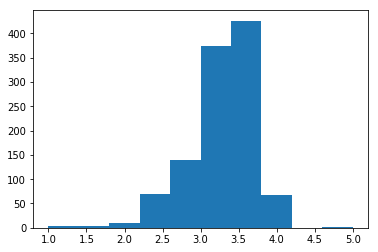

Fig 5: Ratings of Chocolate Bars with 70% Cocoa
The average rating of Cocoa percentage around 70%: 3.2554844606946984


In [31]:
plt.hist(cocoa_seventy['Rating'])
plt.show()
print("Fig 5: Ratings of Chocolate Bars with 70% Cocoa")


mean_cocoa_70 = cocoa_seventy['Rating'].mean()
print("The average rating of Cocoa percentage around 70%: " + str(mean_cocoa_70))

In [32]:
plt.figure(figsize=(20,7))
sns.countplot(x='Cocoa_Percent', data = df, color = 'brown')


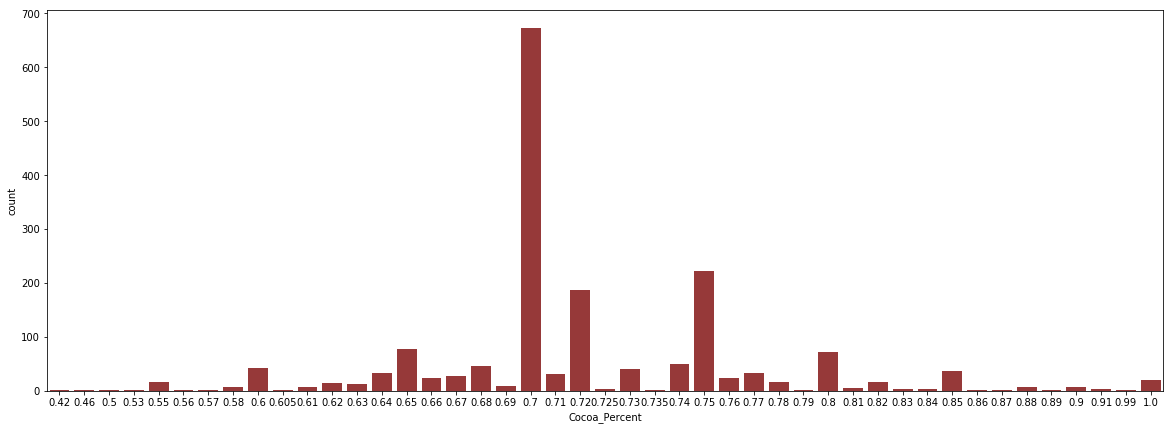

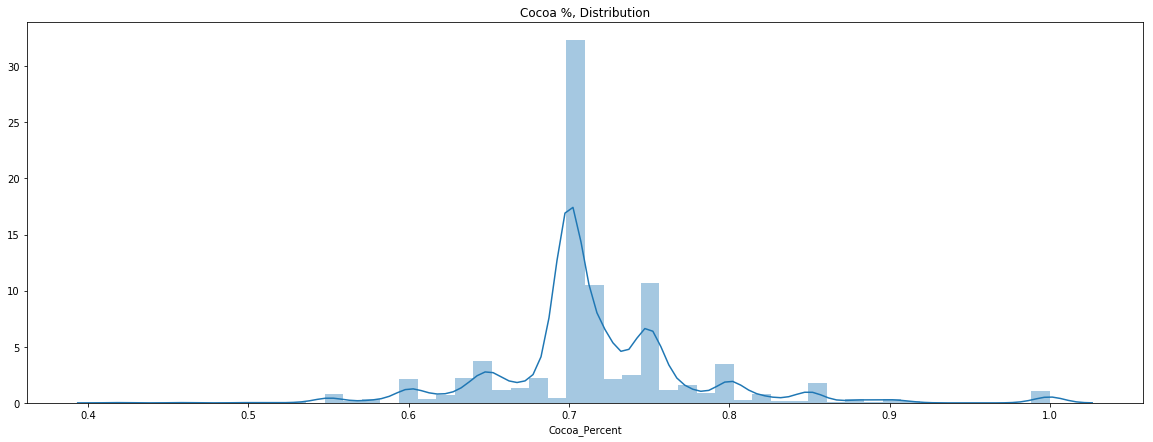

In [33]:
fig, ax = plt.subplots(figsize=[20,7])
sns.distplot(df['Cocoa_Percent'], ax=ax)
ax.set_title('Cocoa %, Distribution')
plt.show()

### (4) Explore the relationship between rating and Bean_Origin

In [34]:
df['Specific_Bean_Origin'].value_counts()

Madagascar                                       56
Peru                                             45
Ecuador                                          42
Dominican Republic                               37
Venezuela                                        21
Chuao                                            19
Sambirano                                        19
Ocumare                                          17
Ghana                                            15
Papua New Guinea                                 15
Belize                                           13
Bolivia                                          12
Trinidad                                         11
Costa Rica                                       11
Grenada                                          11
Brazil                                           11
La Red                                           11
Tanzania                                         11
Porcelana                                        11
Conacado    

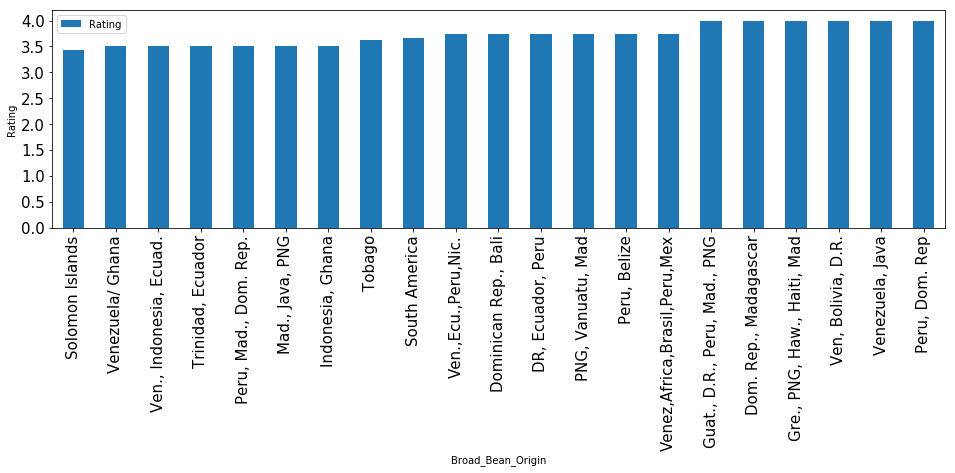

In [54]:
company_list = df["Broad_Bean_Origin"].unique()

rating_list = []
for each_company in company_list:
    df_each = df[df["Broad_Bean_Origin"] == each_company]
    average = df_each["Rating"].mean()
    rating_list.append(average)

company_vs_rating = pd.DataFrame(rating_list, company_list)
company_vs_rating.reset_index(level=0, inplace=True)
company_vs_rating.columns = ["Broad_Bean_Origin", 'Rating']
company_vs_rating
company_vs_rating = company_vs_rating.sort_values(by=['Rating'])
company_vs_rating = company_vs_rating[company_vs_rating['Rating'] > 3.4]
company_vs_rating.plot(x='Broad_Bean_Origin', y='Rating', kind='bar', figsize=(16,4), fontsize=15)
plt.xlabel('Broad_Bean_Origin')
plt.ylabel('Rating')
plt.show()

### Ethics and Privacy

Briefly acknowledge and address any potential issues of ethics and privacy for the proposed project. In particular:
- Do you have permission to use this data, for this purpose?
- Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?) 
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle any issues you identify?

(1-2 paragraphs)
We have the permission to use the data for research purpose. Since this is a dataset all about chocolate and the permission is already given by the author, there is no other privacy concerns related to the dataset. Also, it follows the privacy rules of Safe Harbour. The potential issue with the dataset might be that it indicates which country/location the chocolate was produced, which might has problems of location biases. 
In order to handle the issues, in our analysis, we should not be biased to the result, and just report the result in a research and scientific based way. 

### Discussion

Discuss your project, looking forward to what your results might mean, how they fit it in with what is already known, and what problems you may encounter. 

In particular:
- If your analyses and hypotheses are correct, what will be the contribution of this project to the topic domain? 
- Alternatively, what will you do if you methods don't work and/or your hypotheses are wrong? 
- What are the potential pitfalls and potential confounds of your data and/or methods that may cause problems, and/or influence your interpretations?

(2-3 paragraphs)

Our results would indicate some particular factors that can significantly influence the rating, but others might not. This  result might confirm with the previous analysis, and it also could reject the previous result.

If we prove the hypothesis correct through analyses, the contribution of this project would be helping people to have better understanding of how to select chocolate. It gives people more factors to consider when selecting chocolate. For instance, people could consider more about the origin of chocolate bean to get a higher quality. Other important contribution would be the method of our data analysis process. In order to get the meaningful result, we need to a serial procedures of data analysis: data cleaning, data wrangling, data visualization these processes could help others to understand what we are doing on the data and how we get the result.  

If our hypotheses are wrong, it indicates that our intuition/prediction/previous thought might not be correct. We should think from another perspective while considering our result. If the method doesn’t work, it would be better to re-consider the nature of the data. For instance, we should pay attention to the data itself, whether it has missing data, whether we do the data cleaning correctly.

Other problems that we might encounter could be some technical problems, such as the methods we choose to analyze the data. If we choose the wrong method, the output could reject the hypothesis. Also, sometimes the output matches our expectation, but actually the method we produce that result might be wrong. Thus, using a correct and reasonable data analysis method would be important to achieve a right and reasonable result.

One confound could be that there might have other factors also contribute to the rating of chocolate but we fail to include them. This might cause the result become less accurate.